# LCPB 20-21 exercise 2

### Saverio Monaco

### Gerardo Carmona

### Hilario Capettini

0. Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adadelta, Adagrad, Adam, Adamax, RMSprop, SGD
import time
import math

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


In [2]:
fname = "DATA/sequences16.csv"
sx, sy = np.loadtxt(fname,delimiter=',',
                   usecols=(0,1), unpack=True, dtype=str)
N = len(sy)

Ls = len(sx[0])


perc_train = 0.8 # I kept the same train-test ratio as in the lesson
N_train = int(N*perc_train)
N_test = N - N_train

print('Size of the sequences:   ',Ls)
print('Size of the data:        ',N)
print('Size of the training set:',N_train)
print('Size of the test set:    ',N_test)


Size of the sequences:    16
Size of the data:         3000
Size of the training set: 2400
Size of the test set:     600


In [3]:
# Just printing some datas to check it
# I noticed this isn't the same rule in the lessons, so it is unkown
for _ in range(10):
    print(sx[_],sy[_])


AAGGTCTGCCGGCCGA 1
CCTCCCTTATGGGGGA 0
TCTCTCGGAACTGTCA 0
GTTAAACGTTACATCT 0
TTAAATGCTGCTGATC 1
ATGGAACGAGACGCCG 1
AGGCCAAATGAGGATA 1
CGAGTACACTTAGGCC 0
GAAATAAATCTTATAG 0
AATGTAGATATGGAGT 0


In [4]:
# Converting the label set to int values:
print(sy[0],type(sy[0]))
y = sy.astype(int)
print(y[0],type(y[0]))

1 <class 'numpy.str_'>
1 <class 'numpy.int32'>


In [5]:
# Letters and number of letters
Q = ['A', 'C', 'G', 'T']
Nc = 4

# building the dictionary
onehc = {Q[i]: i for i in range (Nc)}

L = Ls * Nc # lenght of the input array (64)

# The following cycle will transform the input vectors (for ex.: AAGGTCTGCCGGCCGA) in a
# binary like way
#
# A = 1000
# C = 0100
# G = 0010
# T = 0001
#
#   A    A    G    G    T    C   ...
# 1000 1000 0010 0010 0001 0100
x = np.zeros((N,L))
for n in range(N): #for all the samples
    for i in range(Ls): # for every character
        x[n][i*4 + onehc[sx[n][i]]] = 1
        
print(sx[0])
print(x[0])

AAGGTCTGCCGGCCGA
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


In [6]:
(x_train, y_train) = (x[:N_train],y[:N_train])
(x_test, y_test) = (x[N_train:],y[N_train:])

# Check the fraction of datas equal to one
print(y_train.sum() / N_train)
print(y_test.sum() / N_test)

0.24333333333333335
0.25833333333333336


1. Is the model converging with a smaller database of samples with longer sequences? By converging we mean reducing significantly the validation loss function.

In [7]:
# I MADE THE SAME TRAINING IMPLEMENTING 3 FUNCTIONS
# layer_i is an array representing a hidden layer used to create a neural network:
# layer_i = [nodes, activation, dropout_ratio]
# hidden_layers is a array of the hidden layers
layer_1 = [L/2, 'relu', 0]
layer_2 = [L/4, 'relu', .2]
hidden_layers = [layer_1,layer_2]

# optimization chosen
opt = SGD(learning_rate=0.01, momentum=0.9, nesterov= True)

# the first function creates the Neural Network, it needs the input dimension and the array of layers
def createmodel(input_dim, hid_layers,activation = None, dropout = None, summary = False):
    model = Sequential()
    
    # we add the first layer (input layer)
    model.add(Dense(input_dim, input_shape=(input_dim,)))
    
    # we add the hidden layers
    for layer in hid_layers:
        act = activation or layer[1]
        model.add(Dense(layer[0],activation=act))
        drop = dropout or layer[2]
        if drop: model.add(Dropout(drop))
    
    # we add the output layer
    model.add(Dense(1,activation='sigmoid'))
    if summary: print(model.summary())
    
    return model

# the second function trains the model created with createmodel, as a input it needs the output of createmodels
# the optimization and the arguments of model.fit() (except for shuffle)
def trainmodel(model, opt, *args, verbose = 0, **kwargs):
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    fit = model.fit(*args, **kwargs, shuffle = True, verbose = verbose)
    '''fit = model.fit(x_train, y_train,
                    epochs = 60, batch_size = 50,
                    validation_data = (x_test,y_test),
                    shuffle = True)'''
    
    return fit

# the third function takes the output of trainmodel and plot the loss of training data and test data
def plotmodel(fit):
    for obs in ('accuracy', 'loss'):
        plt.figure(figsize=(6,4))
        plt.plot(fit.history[obs], 'r', label = obs + ' of training data')
        plt.plot(fit.history['val_'+obs], 'b--', label = obs + ' of test data')
        plt.ylabel(obs)
        plt.xlabel('Epochs')
        plt.legend()
        plt.show()
        

In [8]:
#Define the model
model = createmodel(L,hidden_layers, summary = True)

#Train the NN
training = trainmodel(model, opt, x_train, y_train,
          epochs=60, batch_size=50, validation_data= (x_test, y_test), verbose=1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
48/48 [==============================] - 1s 15ms/step - loss: 0.6418 - accuracy: 0.6281 - val_loss: 0.55

Epoch 52/60
48/48 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9738 - val_loss: 1.0064 - val_accuracy: 0.7550
Epoch 53/60
48/48 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9728 - val_loss: 1.0226 - val_accuracy: 0.7850
Epoch 54/60
48/48 [==============================] - 0s 1ms/step - loss: 0.0665 - accuracy: 0.9749 - val_loss: 1.0386 - val_accuracy: 0.7850
Epoch 55/60
48/48 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9813 - val_loss: 1.0186 - val_accuracy: 0.7600
Epoch 56/60
48/48 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9771 - val_loss: 1.0326 - val_accuracy: 0.7767
Epoch 57/60
48/48 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9829 - val_loss: 1.0961 - val_accuracy: 0.7717
Epoch 58/60
48/48 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9795 - val_loss: 1.0203 - val_accuracy: 0.7733
Epoch 59/60
4

19/19 [==============================] - 0s 611us/step - loss: 1.0596 - accuracy: 0.8017

Test loss: 1.0596117973327637
Test accuracy: 0.8016666769981384


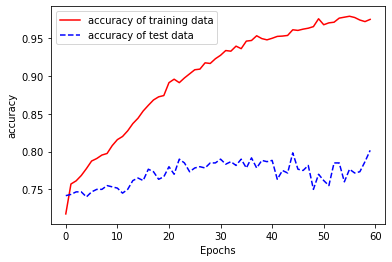

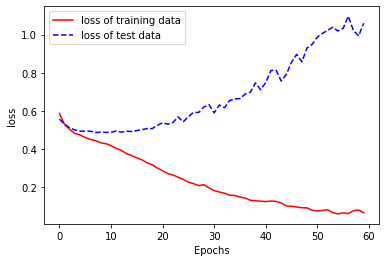

In [9]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plotmodel(training)

We can observe that the loss function is not converging over the test samples for this set of longer strings (16 characters) and less samples (3000) when compared with the dataset studied during the third lecture. On the other hand the loss function over the test set was converging for the case of the aforementioned dataset, reaching an approximate value of 0.2.

This is something reasonable since the number of trainable parameters for the NN (6785) is bigger than the number of samples in the dataset (3000).

2. Try to improve the performance of the DNN over the validation data set by “augmenting”
the training data: For every sample there are L s -1 periodic shifts of the kind
AAACCCTTTGGG→ GAAACCCTTTGG → GGAAACCCTTTG→ etc.
We know that they can break the keys and provide a sample x’[n] with wrong label y[n]
(which is the label of original sample x[n]), but they also enlarge the number of good
samples for the DNN. Which of the two effects is prevalent?
Is the situation improving by augmenting the training data from N t real samples to L s *N t ones with this procedure?

In [10]:
#This function produces the permutations
rot = lambda A: [A[i:]+A[:i] for i in range(len(A))]

In [11]:
#Generate the augmented data
sxx = []
syy = np.zeros(len(sx)*Ls)
for i in range(len(sx)):
    sxx= np.append(sxx,rot(sx[i]))
    syy[i*Ls:(i+1)*Ls] = sy[i]
syy = syy.astype(int)

#Now we permutate the samples 
permutation = np.random.permutation(sxx.shape[0])

sxx = sxx[permutation] 
syy = syy[permutation]

In [12]:
N = len(syy)

Ls = len(sxx[0])

perc_train = 0.8 # I kept the same train-test ratio as in the lesson
N_train = int(N*perc_train)
N_test = N - N_train

print('Size of the sequences:   ',Ls)
print('Size of the data:        ',N)
print('Size of the training set:',N_train)
print('Size of the test set:    ',N_test)

Size of the sequences:    16
Size of the data:         48000
Size of the training set: 38400
Size of the test set:     9600


In [13]:
y = syy
x = np.zeros((N,L))
for n in range(N): #for all the samples
    for i in range(Ls): # for every character
        x[n][i*4 + onehc[sxx[n][i]]] = 1
        
print(sxx[0])
print(x[0])

TGGTTTCTTGTAAATT
[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]


In [14]:
(x_train, y_train) = (x[:N_train],y[:N_train])
(x_test, y_test) = (x[N_train:],y[N_train:])

# Check the fraction of datas equal to one
print(y_train.sum() / N_train)
print(y_test.sum() / N_test)

0.245703125
0.24885416666666665


In [15]:
#Define the model
model = createmodel(L,hidden_layers, summary = True)

#Train the NN
training = trainmodel(model, opt, x_train, y_train,
          epochs=60, batch_size=50, validation_data= (x_test, y_test), verbose=1)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
768/768 [==============================] - 1s 684us/step - loss: 0.5467 - accuracy: 0.7300 - val_loss:

768/768 [==============================] - 0s 549us/step - loss: 0.2218 - accuracy: 0.9190 - val_loss: 0.2649 - val_accuracy: 0.8994
Epoch 51/60
768/768 [==============================] - 0s 557us/step - loss: 0.2229 - accuracy: 0.9194 - val_loss: 0.2701 - val_accuracy: 0.9003
Epoch 52/60
768/768 [==============================] - 0s 550us/step - loss: 0.2194 - accuracy: 0.9200 - val_loss: 0.2651 - val_accuracy: 0.8999
Epoch 53/60
768/768 [==============================] - 0s 550us/step - loss: 0.2189 - accuracy: 0.9207 - val_loss: 0.2607 - val_accuracy: 0.9018
Epoch 54/60
768/768 [==============================] - 0s 548us/step - loss: 0.2231 - accuracy: 0.9182 - val_loss: 0.2761 - val_accuracy: 0.8943
Epoch 55/60
768/768 [==============================] - 0s 550us/step - loss: 0.2203 - accuracy: 0.9209 - val_loss: 0.2756 - val_accuracy: 0.8941
Epoch 56/60
768/768 [==============================] - 0s 550us/step - loss: 0.2195 - accuracy: 0.9228 - val_loss: 0.2731 - val_accuracy: 0.89

300/300 [==============================] - 0s 555us/step - loss: 0.2623 - accuracy: 0.9064

Test loss: 0.26234981417655945
Test accuracy: 0.9063541889190674


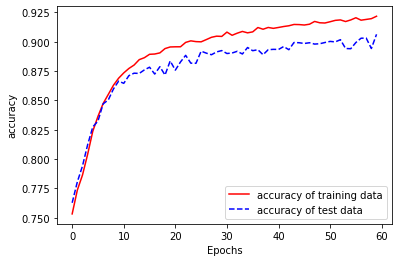

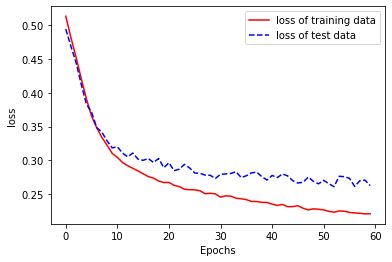

In [16]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plotmodel(training)

It can be seen that the training of the NN over the augmented data is highly effective for this case. The accuracy over the test data is converging above 0.9 while the loss over the same dataset is converging to a value below 0.25. When those plots are compared with the previous where the dataset was 16 times smaller we can say that the procedure for augmenting the data has been successful. Even when we are introducing false positives inside of the dataset.

Clearly the prevalent effect is that more real samples are being produced.

3. Implement a “grid search” as shown in NB11 to improve one or more of the aspects or
parameters of the model. Possible tests include: different activation units (sigmoid, relu, elu,
etc.), different minimization algorithms (ADAM, RMSprop, Nesterov, etc.), different
dropouts, etc.

In [17]:
def compile_model(optimizer, activation = None, dropout = None, learning_rate = 0.1):
    model = createmodel(L,hidden_layers, activation = activation, dropout = dropout)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate = learning_rate),
                  metrics=['accuracy'])
    return model

# Using Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=60,
                        batch_size = 50, 
                        verbose=1)

optimizer = [SGD, RMSprop, Adam, Adamax]
dropout = [0.1,0.3,0.5]
learning_rate = [0.001,0.01,0.1]
activation = ['relu', 'elu']

# parameters dictionary
param_grid = dict(optimizer=optimizer, activation = activation, dropout = dropout, learning_rate = learning_rate)
# Run gridsearch
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
best_model = grid_result.best_estimator_

Epoch 1/60
768/768 [==============================] - 1s 425us/step - loss: 0.5297 - accuracy: 0.7520
Epoch 2/60
768/768 [==============================] - 0s 424us/step - loss: 0.4814 - accuracy: 0.7734
Epoch 3/60
768/768 [==============================] - 0s 420us/step - loss: 0.4539 - accuracy: 0.7868
Epoch 4/60
768/768 [==============================] - 0s 421us/step - loss: 0.4294 - accuracy: 0.8003
Epoch 5/60
768/768 [==============================] - 0s 422us/step - loss: 0.4083 - accuracy: 0.8146
Epoch 6/60
768/768 [==============================] - 0s 420us/step - loss: 0.3827 - accuracy: 0.8263
Epoch 7/60
768/768 [==============================] - 0s 420us/step - loss: 0.3711 - accuracy: 0.8328
Epoch 8/60
768/768 [==============================] - 0s 421us/step - loss: 0.3600 - accuracy: 0.8393
Epoch 9/60
768/768 [==============================] - 0s 421us/step - loss: 0.3431 - accuracy: 0.8500
Epoch 10/60
768/768 [==============================] - 0s 420us/step - loss: 0.333

In [18]:
# summarize results
best_score = grid_result.best_score_
best_params = grid_result.best_params_
best_activation, best_dropout, best_lr, best_opt = best_params['activation'], best_params['dropout'], best_params['learning_rate'], best_params['optimizer']
print(f"Best: {best_score} using {best_params}")


print("All mean scores on the grid:")
allscores =grid_result.cv_results_['mean_test_score']
stdscores =grid_result.cv_results_['std_test_score']
print('%-25s%-15s%-15s%-22s%-20s%-25s' %('Optimizer','Activation','Dropout','Learning rate','Score','Mean time'))
print('------------------------------------------------------------------------------------------------------------')
scores =[]
times =[]
for i in range(len(allscores)):
    print('%-27s %-13s %-18.1f %-10.3f %-6.3f %-3s %-6.3f  ' %(str(grid_result.cv_results_['params'][i]['optimizer'])[42:][:-2],
                                               grid_result.cv_results_['params'][i]['activation'],
                                               grid_result.cv_results_['params'][i]['dropout'],
                                               grid_result.cv_results_['params'][i]['learning_rate'],
                                               allscores[i],'+/-',stdscores[i]),
                                               grid_result.cv_results_['mean_fit_time'][i])
    scores.append(allscores[i])
    times.append(grid_result.cv_results_['mean_fit_time'][i])

Best: 0.9181770831346512 using {'activation': 'relu', 'dropout': 0.1, 'learning_rate': 0.1, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>}
All mean scores on the grid:
Optimizer                Activation     Dropout        Learning rate         Score               Mean time                
------------------------------------------------------------------------------------------------------------
v2.gradient_descent.SGD     relu          0.1                0.001      0.766  +/- 0.004    48.37191158533096
v2.rmsprop.RMSprop          relu          0.1                0.001      0.901  +/- 0.007    52.33449226617813
v2.adam.Adam                relu          0.1                0.001      0.911  +/- 0.011    57.52218133211136
v2.adamax.Adamax            relu          0.1                0.001      0.874  +/- 0.004    51.423601508140564
v2.gradient_descent.SGD     relu          0.1                0.010      0.839  +/- 0.007    47.13706201314926
v2.rmsprop.RMS

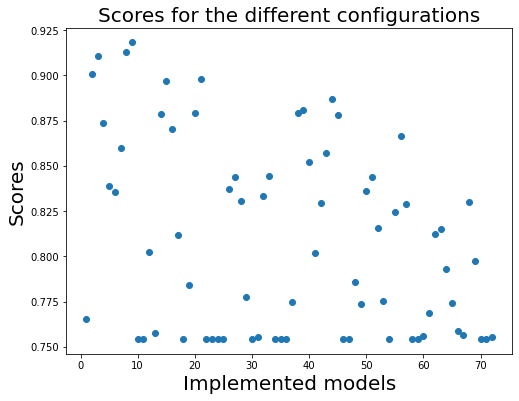

In [19]:
# Plot scaled histogram
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(np.linspace(1,len(allscores),num=len(allscores)),scores)

plt.title('Scores for the different configurations', fontsize=20)
plt.xlabel('Implemented models', fontsize=20)
plt.ylabel('Scores', fontsize=20)
plt.show()


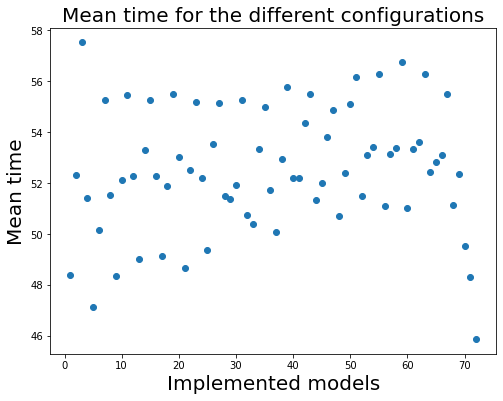

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(np.linspace(1,len(allscores),num=len(allscores)),times)

plt.title('Mean time for the different configurations', fontsize=20)
plt.xlabel('Implemented models', fontsize=20)
plt.ylabel('Mean time', fontsize=20)
plt.show()


4. See if any rescaling of data may improve the results. For instance one may use [-0.5,+0.5]
instead of [0,1] for every bit of x[n].

In [21]:
def rescale_input(x, shift, largeness):
    return (x - .5 )* largeness + shift

In [22]:
# Normally as a preprocessing operation the data is rescaled, here we see the importance of this preprocessing
# operation.
# First we center our data around zero:
#          [0,1] --> [-1.5,1.5]

# Rescaling transformation
resc_x = rescale_input(x,0,3)

# y remains the same
resc_y = (y)

# print the inputs just as a check
print(resc_x)

(resc_x_train, resc_y_train) = (resc_x[:N_train],resc_y[:N_train])
(resc_x_test, resc_y_test) = (resc_x[N_train:],resc_y[N_train:])

[[-1.5 -1.5 -1.5 ... -1.5 -1.5  1.5]
 [-1.5  1.5 -1.5 ...  1.5 -1.5 -1.5]
 [-1.5 -1.5 -1.5 ...  1.5 -1.5 -1.5]
 ...
 [-1.5 -1.5 -1.5 ... -1.5  1.5 -1.5]
 [ 1.5 -1.5 -1.5 ... -1.5 -1.5 -1.5]
 [-1.5 -1.5  1.5 ... -1.5  1.5 -1.5]]


In [23]:
best_model = createmodel(L, hidden_layers, activation= best_activation, dropout= best_dropout)
best_opt = best_opt(learning_rate=best_lr)
# Training of the model with the rescaled data
resc_training = trainmodel(best_model, best_opt, resc_x_train, resc_y_train,
          epochs=60, batch_size=50, validation_data= (resc_x_test, resc_y_test))

300/300 [==============================] - 0s 555us/step - loss: 0.2189 - accuracy: 0.9312


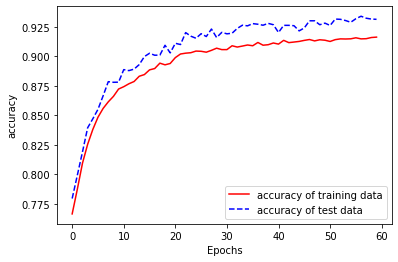

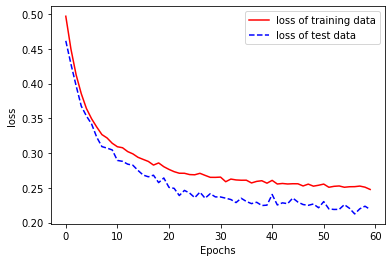

In [24]:
# evaluate model
resc_score = best_model.evaluate(resc_x_test, resc_y_test, verbose=1)

plotmodel(resc_training)

In [25]:
print('Test loss:                  ', round(score[0],5))
print('Rescaled Data Test loss:    ', round(resc_score[0],5))

print('\nTest accuracy:              ', round(score[1],5))
print('Rescaled Data Test accuracy:', round(resc_score[1],5))

Test loss:                   0.26235
Rescaled Data Test loss:     0.21888

Test accuracy:               0.90635
Rescaled Data Test accuracy: 0.93125


In [26]:
# Now we rescale the data to be far away from zero, we should expect less quality of the training due to 
# Gradient Vanishing
# Rescaling transformation
resc_x_2 = rescale_input(x,6,5)

# y remains the same
resc_y_2 = (y)

# print the inputs just as a check
print(resc_x_2)

(resc_x_2_train, resc_y_2_train) = (resc_x_2[:N_train],resc_y_2[:N_train])
(resc_x_2_test, resc_y_2_test) = (resc_x_2[N_train:],resc_y_2[N_train:])

# Reinitialize the model
best_model = createmodel(L, hidden_layers, activation= best_activation, dropout= best_dropout)

# Training of the model with the rescaled data
resc_2_training = trainmodel(best_model, best_opt, resc_x_2_train, resc_y_2_train,
          epochs=60, batch_size=50, validation_data= (resc_x_2_test, resc_y_2_test))

[[3.5 3.5 3.5 ... 3.5 3.5 8.5]
 [3.5 8.5 3.5 ... 8.5 3.5 3.5]
 [3.5 3.5 3.5 ... 8.5 3.5 3.5]
 ...
 [3.5 3.5 3.5 ... 3.5 8.5 3.5]
 [8.5 3.5 3.5 ... 3.5 3.5 3.5]
 [3.5 3.5 8.5 ... 3.5 8.5 3.5]]


300/300 [==============================] - 0s 555us/step - loss: 0.2952 - accuracy: 0.8843


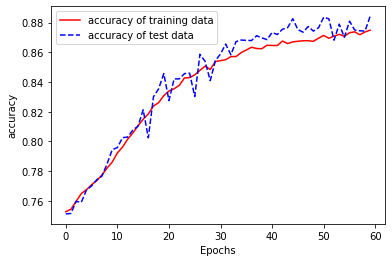

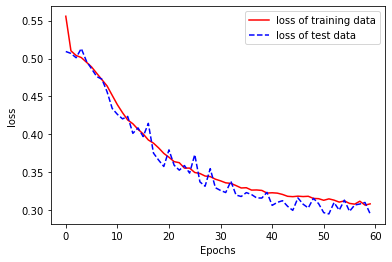

In [110]:
resc_2_score = best_model.evaluate(resc_x_2_test, resc_y_2_test, verbose=1)

plotmodel(resc_2_training)

In [28]:
print('Test loss:                  ', round(score[0],5))
print('Rescaled Data Test loss:    ', round(resc_2_score[0],5))

print('\nTest accuracy:              ', round(score[1],5))
print('Rescaled Data Test accuracy:', round(resc_2_score[1],5))

Test loss:                   0.26235
Rescaled Data Test loss:     0.56147

Test accuracy:               0.90635
Rescaled Data Test accuracy: 0.75115
